# CFD Results Post-Process and Validation

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). This steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained results for 2D laminar flow over a rotating cylinder with Reynolds of 100 (Re=100) and Tip Speed Ratio of 1 (TSR=1) is processed and discussed in this section. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow variables, such as continuity, velocity and pressure. In OpenFoam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the `controlDict` dictionary file. A sample of time report is shown below for the last time step `t=150`:

```C++
Time = 150

smoothSolver:  Solving for Ux, Initial residual = 0.000151043, Final residual = 3.09096e-07, No Iterations 1
smoothSolver:  Solving for Uy, Initial residual = 0.00280328, Final residual = 3.8923e-06, No Iterations 1
GAMG:  Solving for p, Initial residual = 0.00362463, Final residual = 2.10891e-05, No Iterations 4
time step continuity errors : sum local = 3.96951e-11, global = 7.39423e-13, cumulative = -5.5588e-09
GAMG:  Solving for p, Initial residual = 0.000682323, Final residual = 8.29347e-08, No Iterations 11
time step continuity errors : sum local = 1.56155e-13, global = 4.42665e-14, cumulative = -5.55876e-09
ExecutionTime = 1042.76 s  ClockTime = 1053 s

forceCoeffs forcesCoeffs output:
    Cm    = -0.0960072
    Cd    = 1.30985
    Cl    = -0.954175
    Cl(f) = -0.573095
    Cl(r) = -0.38108

Courant Number mean: 0.0238165 max: 0.565953
```

The residual value of each variable denotes how the numerical value of that variable is differing from the previous time step. Lower value of residual indicates the obtained numerical value of the variable of interest has converged to a specific value. In this simulation this is true for `U_x`, `U_y` and `p` that have residual values by order of at least `1e-6`. The reported `continuity errors` defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of `1e-13` in this problem confirms that continuity equation is being satisfied.

Once the simulation is ran in OpenFoam the user can make and plot the trend of evolution for different variables at the end of the simulations. Running the command `foamJob -s pimpleFoam` before starting the iterations and then in the end od simulation running the command `foamLog log` inside the main working directory will make a history of log files for different flow field variables inside a new directory called `logs`. Changing the directory into `logs` directory and running `gnuplot` command, user can plot the obtained numerical residuals. This process was done for simulation with $Re=100$ and $TSR=1$ and generated log files were visualized using the following commands:

```C++
gnuplot
gnuplot> set xlabel "Iterations"          #sets label of x-axis
gnuplot> set ylabel "Residuals"           #sets label of y-axis
gnuplot> set logscale y                   #sets logarithmic scale of y axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/1residuals.png" width="500" align="middle">
</br>
Fig. 1 The initial residual values of `U_x` and `p` with the continuity error values versus time steps.

The general decreasing trend of the residual and error values confirm that the numerical solution of the conservation/governing equations are converging to specific final values. This decreasing trend is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step of post-processing is to visualize dimensionless form of the important flow field variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice, which will be explained for the current case study shortly. To post-process the obtained numerical results in OpenFoam it is recommended to use the post-processor package of OpenFoam called `ParaView`. `ParaView` can be launched running the command

```C++
paraFoam
```

in the terminal, while locating in the working directory of the simulation. Running this command will simply read all the obtained numerical results and get it ready for post-processing. Once the user runs `paraFoam` command and the software loads up, all the boundaries and fields should be activated (i.e. checked in their box) and the `Apply` bottom under `Properties` window should be hit to load the numerical results.

For most of the problems visualization of normalized velocity or pressure contours over a horizontal or vertical plane at the center of the CFD domain is a good start point for post-processing the obtained numerical data. For the current problem, since the entire domain is two dimensional and planar, the entire domain itself is the best candidate of post-processing plane. User should now define the normalized variable of interest needs to be visualized. Defining variables can be done following path of `Filters/Data Analysis/Calculator`. This command will open a new panel under `Properties`, where users can define their variable of interest; Name the variable (i.e. `U_norm`) and enter the required formula/definition for the normalized variable of interest (i.e. `U_x/1`) and hit `Apply`. This will calculate the normalized streamwise velocity with free stream velocity within the entire CFD domain for all the time steps and visualize the results for `t=0`. Using the `play` bottom users can see the formation of laminar boundary layer and wake around and in the back of the rotating cylinder:

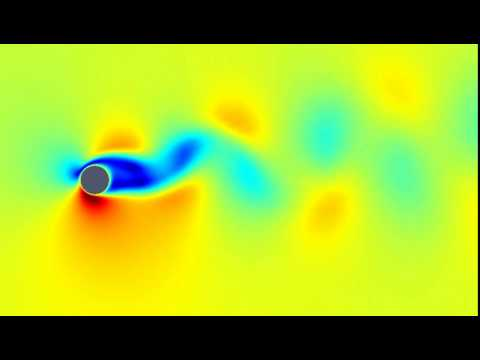

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("oRHqElTxdMo")

Fig. 2 - Animation of the normalized streamwise velocity contours with the free stream velocity for flow over a rotating cylinder with $Re=100$ and $TSR$=1 at `t=150`.

Fig. 2 visualizes the evolution of the normalized streamwise velocity with free stream for flows with $Re=100$ and $TSR=1$. The Flow enters the domain with normalized velocity of 1. Due to the imposed no-slip boundary conditions over the surface of cylinder, the velocity instantly decrease to zero on the nose of the cylinder and a laminar boundary layer starts to form and grow around the cylinder's surface. After few time steps due to the unsteadiness of the flow at Re=100, vortices start to form and shed from the top and bottom of the cylinder in to it's wake. This flow field behavior of the flow over a rotating cylinder with $TSR=1$ is very similar to the flow field pattern in the case of fixed cylinder in which the $TSR=0$. Two main differences between these two cases is that in the case of rotating cylinder, due to the cylinder rotation, the vortex shedding frequency is lower and the wake of the cylinder gets an asymmetric shape in the direction of cylinder rotation. Increasing the TSR of the cylinder (i.e. the angular speed) the vortex shedding frequency in the wake of the cylinder gradually decreases and after a critical TSR value of the vortex shedding will completely be suppressed (i.e. vortex shedding frequency of zero). 

In order to confirm the above mentioned hypotheses users can visualize the vorticity field within the CFD domain for two different case studies with Re=100 and TSR or 0.5 and 2. In order to perform this step of post-processing users have to first calculate the vorticity field at different time steps by closing the open ParaView session and running the following command while locating in the working directory:

```C++
vorticity
```

Execution of the `vorticity` command will calculate and save vorticity field data for all time steps. Now again by running `paraFoam` and loading the variables, including the calculated vorticity data, user can choose the vorticity field from the drop down list and visualize it within the CFD domain. Fig.3 shows vorticity contours around the cylinder for TSR of 0.5 and 2.

<img src="./Images/3vortContours.png" width="800" align="middle">
</br>
Fig. 3 - Vorticity contours for flow over a rotating cylinder with Re=100 and a) $TSR=0.5$ and b) $TSR=2$ at timestep of `t=150`.

Suppression of the vortex shedding in the wake of the rotating cylinder removes the previously existing pressure gradient across the cylinder, due to pre-existing low-pressure region just behind the cylinder. As a result of this phenomena a lower drag forceis experienced by the cylinder compared to the case study of stationary cylinder. On the other other side of the spectrum, rotation of the cylinder leads to a velocity gradient, hence a pressure gradient, between the top and bottom of the cylinder as visualized in Fig. 2(b). This gradient will lead to a force acting normal to streamwise flow direction and generates a "lift force". This is an entirely new phenomena, compared to the stationary cylinder, due to the rotation of the cylinder and is called the **Magnus Effect** . It should be recalled that in the case of stationary cylinder, due to the flow field symmetry, the normal component of the forces exerted on the cylinder's wall would cancel each other out and lift force will be almost zero. For more information on the topic of **Magnus Effect** please see [here](https://en.wikipedia.org/wiki/Magnus_effect).

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

In order to validate the numerical results from these simulations the numerically predicted drag coefficients of the cylinder were compared against values from a previous numerical study [here](http://cfd.mace.manchester.ac.uk/twiki/pub/Main/FlettnerRotors/Stojkovic_PoF_2002.pdf) for flow field with $Re=100$ but different Tip Speed Ratios (TSR). The value of the drag coefficient of the cylinder is defined as:

$$ C_D~=~\frac{F_D}{\frac{1}{2} . \rho_{ref} . V_{ref} ^2 . A_{proj}}. $$

In this equation $F_D$, the total drag force due to pressure and viscous forces within the flow acting on the cylinder's surface in the streamwise direction, is normalized with the available momentum within the undisturbed incoming flow that could be exerted on the cylinder. The value of this momentum is calculated using $\rho_{ref}$ as the reference density of the flow, which is the density of the flow. $V_{ref}$ as the undisturbed streamwise flow velocity in the inlet and $A_{proj}$, which is the projected area of the cylinder surface. For a two-dimensional cylinder the projected area is equal to the diameter of the cylinder. This is the area where pressure and viscus forces are acting on the cylinder in the streamwise direction. It should be noted that the pressure and viscous forces in the perpendicular direction to streamwise direction cancel each other. Hence, the forces and areas that they act on does not have any contribution to the drag force and coefficient.

Similarly the lift coefficient of the cylinder is defined as:

$$ C_L~=~\frac{F_L}{\frac{1}{2} . \rho_{ref} . V_{ref} ^2 . A_{proj}}. $$

where $F_L$ is the total lift force acting on the cylinder's surface.

As discussed earlier in the Simulation section user can take advantage of pre-written functions and libraries to calculate and report drag force coefficient values. The "forceCoeffs" function, added to `controlDict` dictionary file located in `\system` directory, takes "cylinder" walls as the patch and calculates the forces on in the defined directions. This was completely discussed in the Simulation section. Table 1 provides a summary of comparison between the present study and literature calculated drag and lift coefficients values:

| Tip Speed Ratio #  | $C_D$ Present Study| $C_D$ D. Stojković *et al.* (2002) | Relative Error [%]| $C_L$ Present Study| $C_L$ D. Stojković *et al.* (2002) | Relative Error [%]|
| :-------------:|:-----------:|:--------:|:-------:|:-----------:|:--------:|:-------:|
| 0.5        | 1.2819      | 1.2740        |0.6| 1.2180      | 1.220        |0.1|
| 1          | 1.1112      | 1.1080        |0.2| 2.4978      | 2.504        |0.26|
| 1.5        | 0.8358      | 0.8180        |2.1| 3.8962      | 3.900        |0.1|
| 2          | 0.5415      | 0.4611        |17.4| 5.5381     | 5.48         |1|
Table 1. Comparison between the numerically predicted drag coefficient on a rotating cylinder with Re=100 and different Tip Speed Ratios.

As shown in the Table 1 the values of the relative error percentages for $C_D$ are below 2.1% for case studies with relatively low TSR values (below 1.5). Furthermore, Table 1 reveals that for TSR value of 2 and above the relative error percentage of corresponding drag coefficient values increases significantly. The reason behind this is the increase of the total velocity of the flow (algebraic summation of streamwise and rotating velocity components) and therefore more complex physics of the laminar boundary layer. As long as the flow regime is laminar this error can be reduced by decreasing the time step value of the simulation from 0.01 second. However, if increasing the TSR value lead into change of a flow regime from Laminar to Transitional or Turbulent flow, adequate mesh resolution and if required numerical scheme should be used to accurately estimated the drag coefficient of the rotating cylinder and simulate the flow field around and in the wake of the cylinder. However the results for $C_L$ indicate that the relative error percentages for this coefficient are much lower even in high rotating velocities. The reason of this low error may be due to a much more simple physics of the flow in the regions at top and bottom of the cylinder surface which affect the $C_L$ value directly. This has resulted in better prediction of the flow even in high time step values and has improved the accuracy of the results.

It has to be also noted that an increase in TSR, will result in a rise in $C_L$, which approves the previously mentioned phenomena called Magnus effect.

At this stage one can conclude that this CFD numerical simulation is validated to study unsteady laminar flow over a rotating cylinder. Therefore, these simulations can be used for similar or more complex problems, such as three dimensional laminar flow over a rotating cylinder or sphere. This can be done via correct implementation in changing the corresponding solver, models and/or boundary conditions.

## Source(s)

> Stojković, D., M. Breuer, and F. Durst. "Effect of high rotation rates on the laminar flow around a circular cylinder." Physics of Fluids (1994-present) 14.9 (2002): 3160-3178.

> For more details on Open Foam user guides and tutorials in Farsi language make sure to check out the contributor's website at http://openfoam.ir .  